In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mn

from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from feature_engine import imputation
from feature_engine import encoding

### cleaning pipeline

In [3]:
house_train_data = pd.read_csv('../../data/train.csv', index_col='Id')
house_test_data = pd.read_csv('../../data/test.csv', index_col='Id')

In [4]:
house_train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
house_train_data.shape

(1460, 80)

### missing values

<Figure size 1800x1200 with 0 Axes>

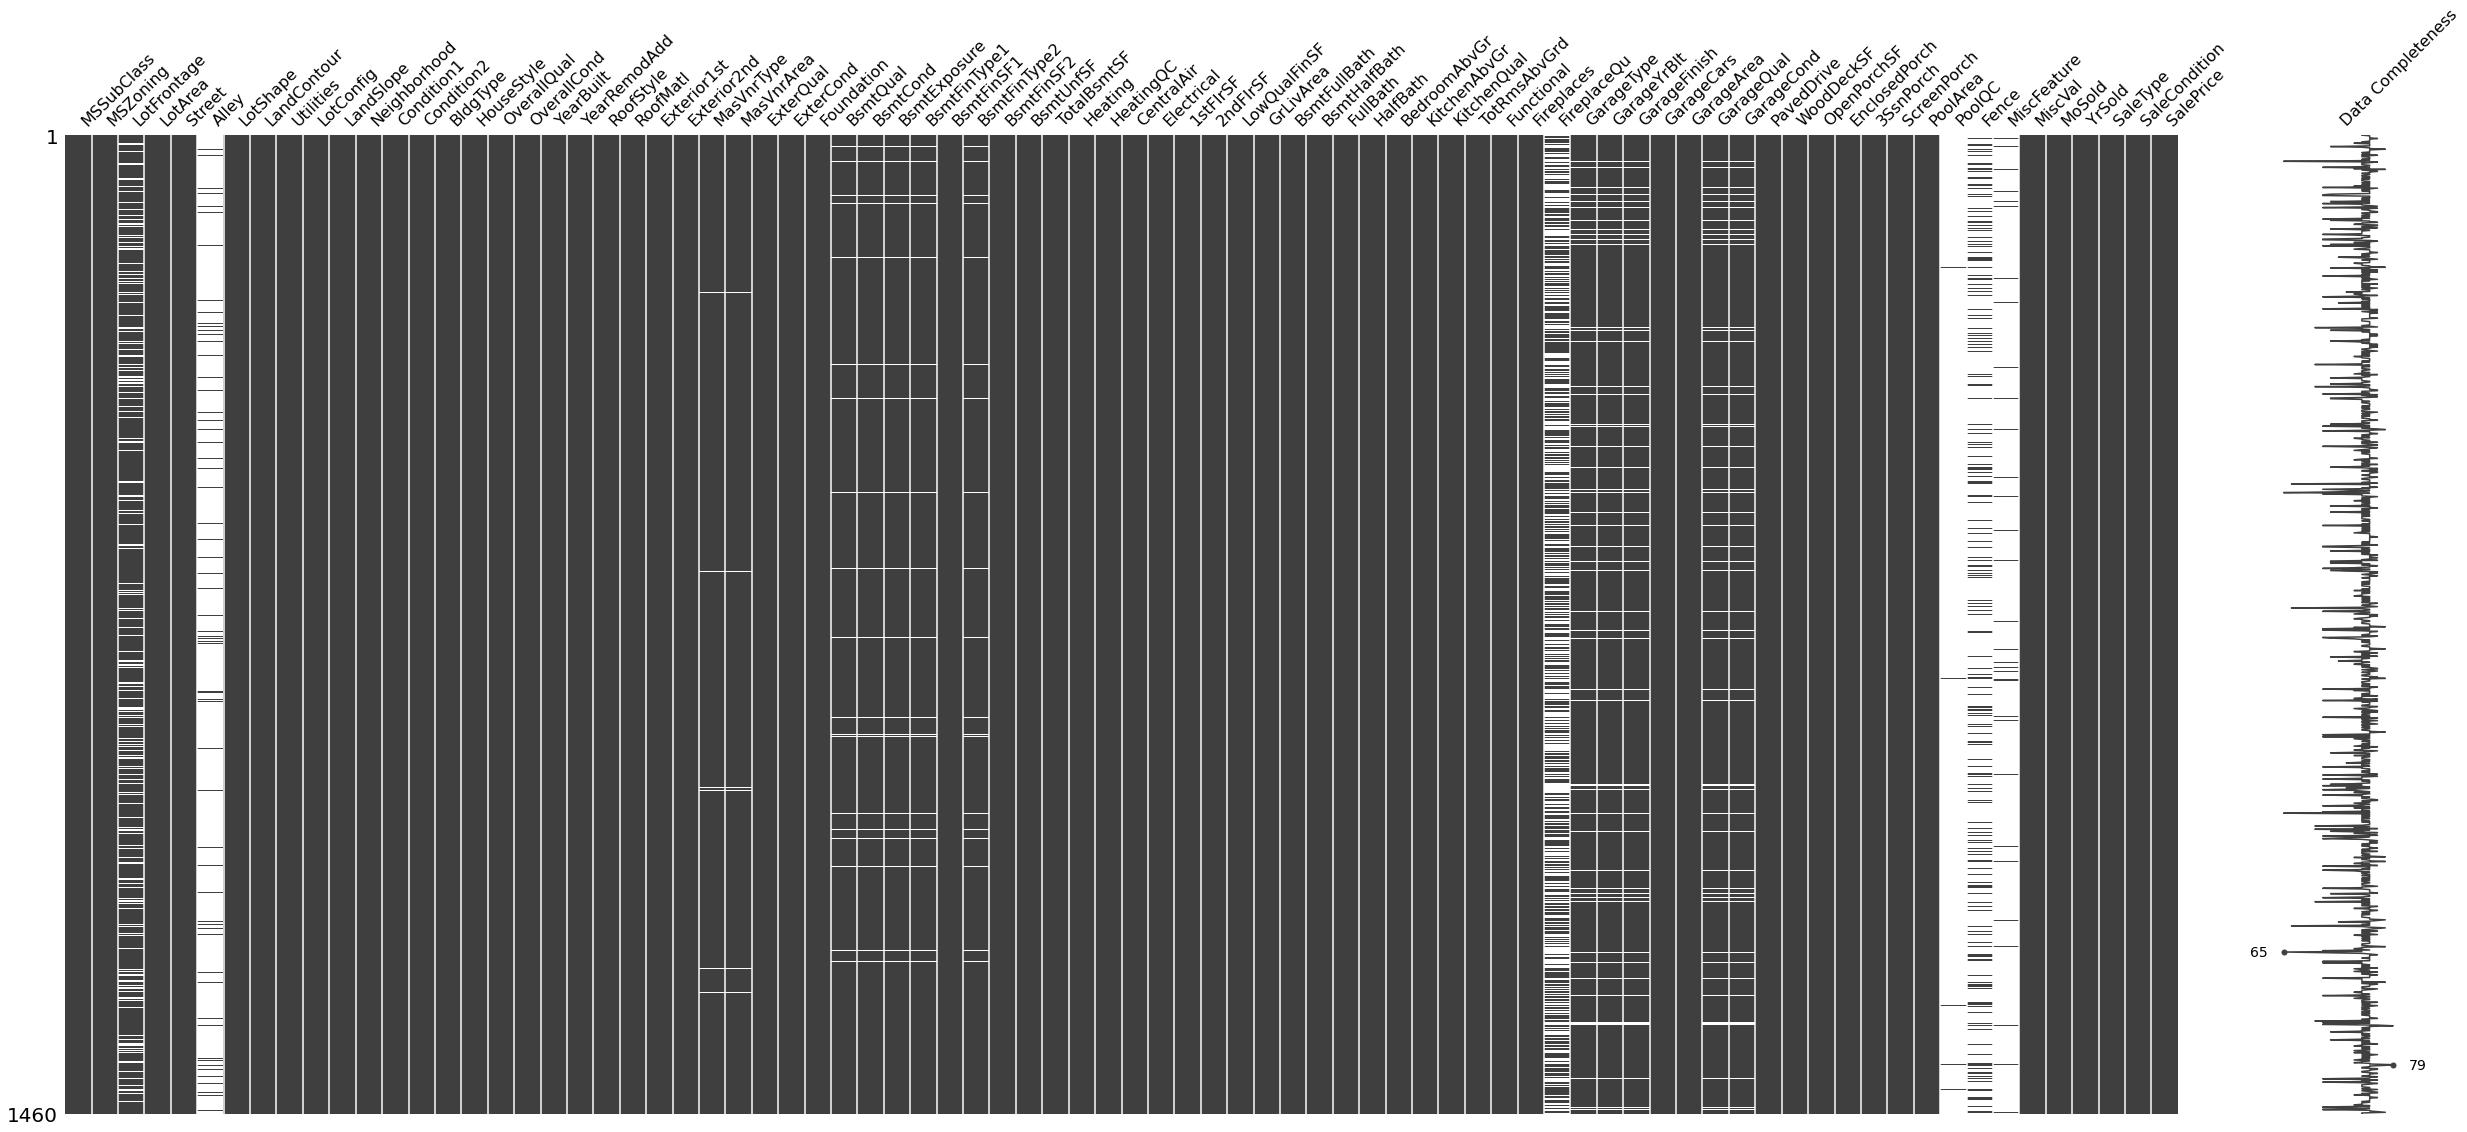

In [7]:
plt.figure(dpi=300)
mn.matrix(df=house_train_data,
          labels=house_train_data.columns.to_list,
          figsize=[42, 18])
plt.savefig('../graph/missing_value_matrix.png')
plt.show()

In [8]:
pd.options.display.max_rows = 83

missing_matrix = pd.DataFrame(data=[house_train_data.isna().sum()]).T
missing_matrix['missing percentage'] = (missing_matrix[0] * 100) / house_train_data.shape[0]
missing_matrix['data type'] = house_train_data.dtypes.values
missing_matrix.rename(columns={0: 'missing count'}, inplace=True)

In [9]:
color_map = sns.light_palette(color='green', as_cmap=True)
missing_matrix.sort_values(by='missing percentage',
                           ascending=False).style.background_gradient(cmap=color_map)

,missing count,missing percentage,data type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object


### cleaning pipeline

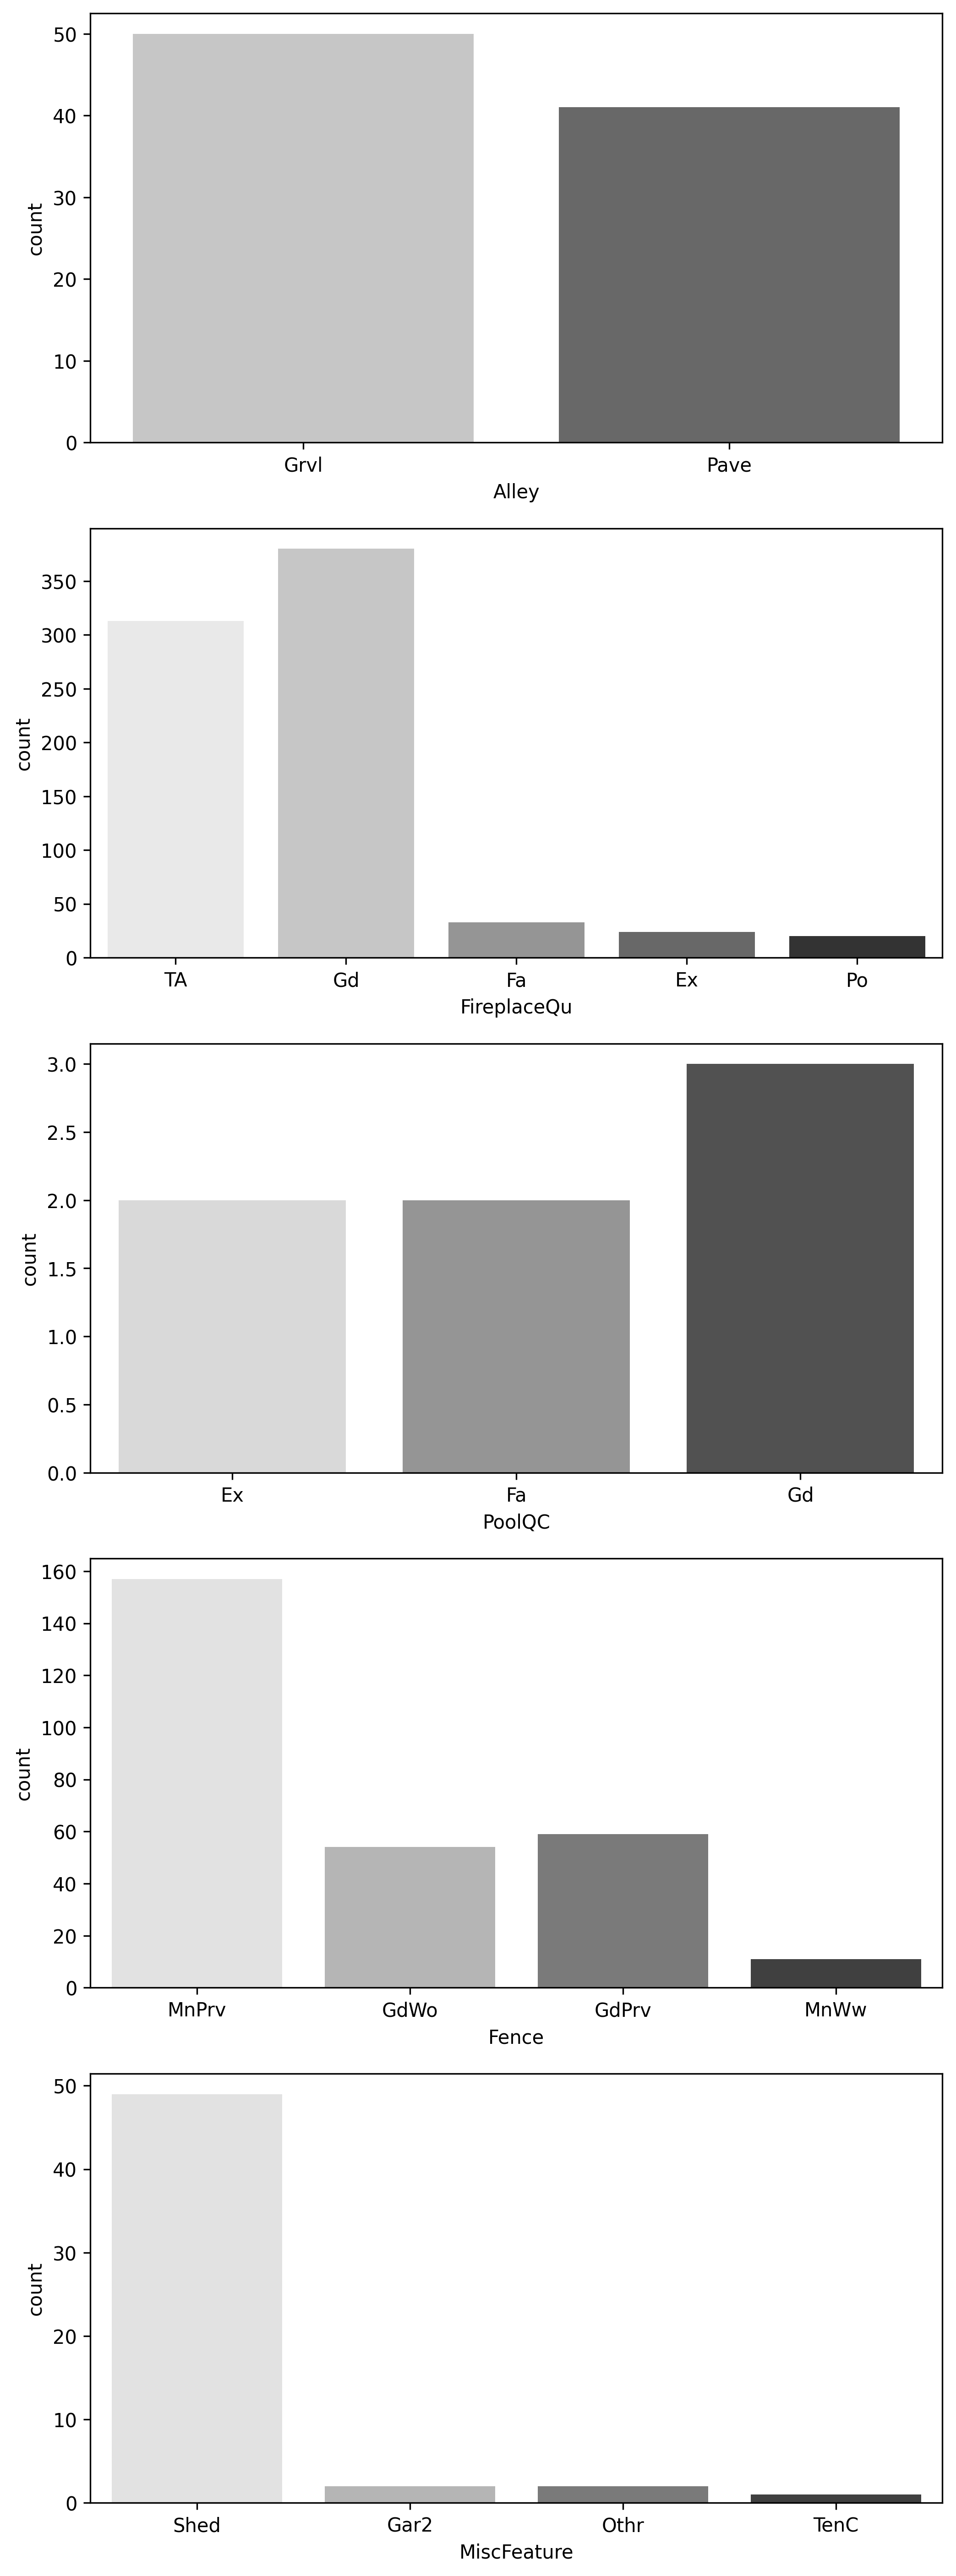

In [10]:
missing_most_cat_var = missing_matrix[missing_matrix['missing percentage'] > 40]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[8, 24], dpi=300)
axes = axes.ravel()

for i in range(len(axes)):
    sns.countplot(x=house_train_data[missing_most_cat_var.index.values[i]],
                  palette='Greys',
                  ax=axes[i])

plt.savefig('../graph/class_balance_before.png')
plt.show()

In [13]:
impute_most_missing_cat = imputation.CategoricalImputer(variables=list(missing_most_cat_var.index.values))
trans_cat = impute_most_missing_cat.fit_transform(house_train_data)

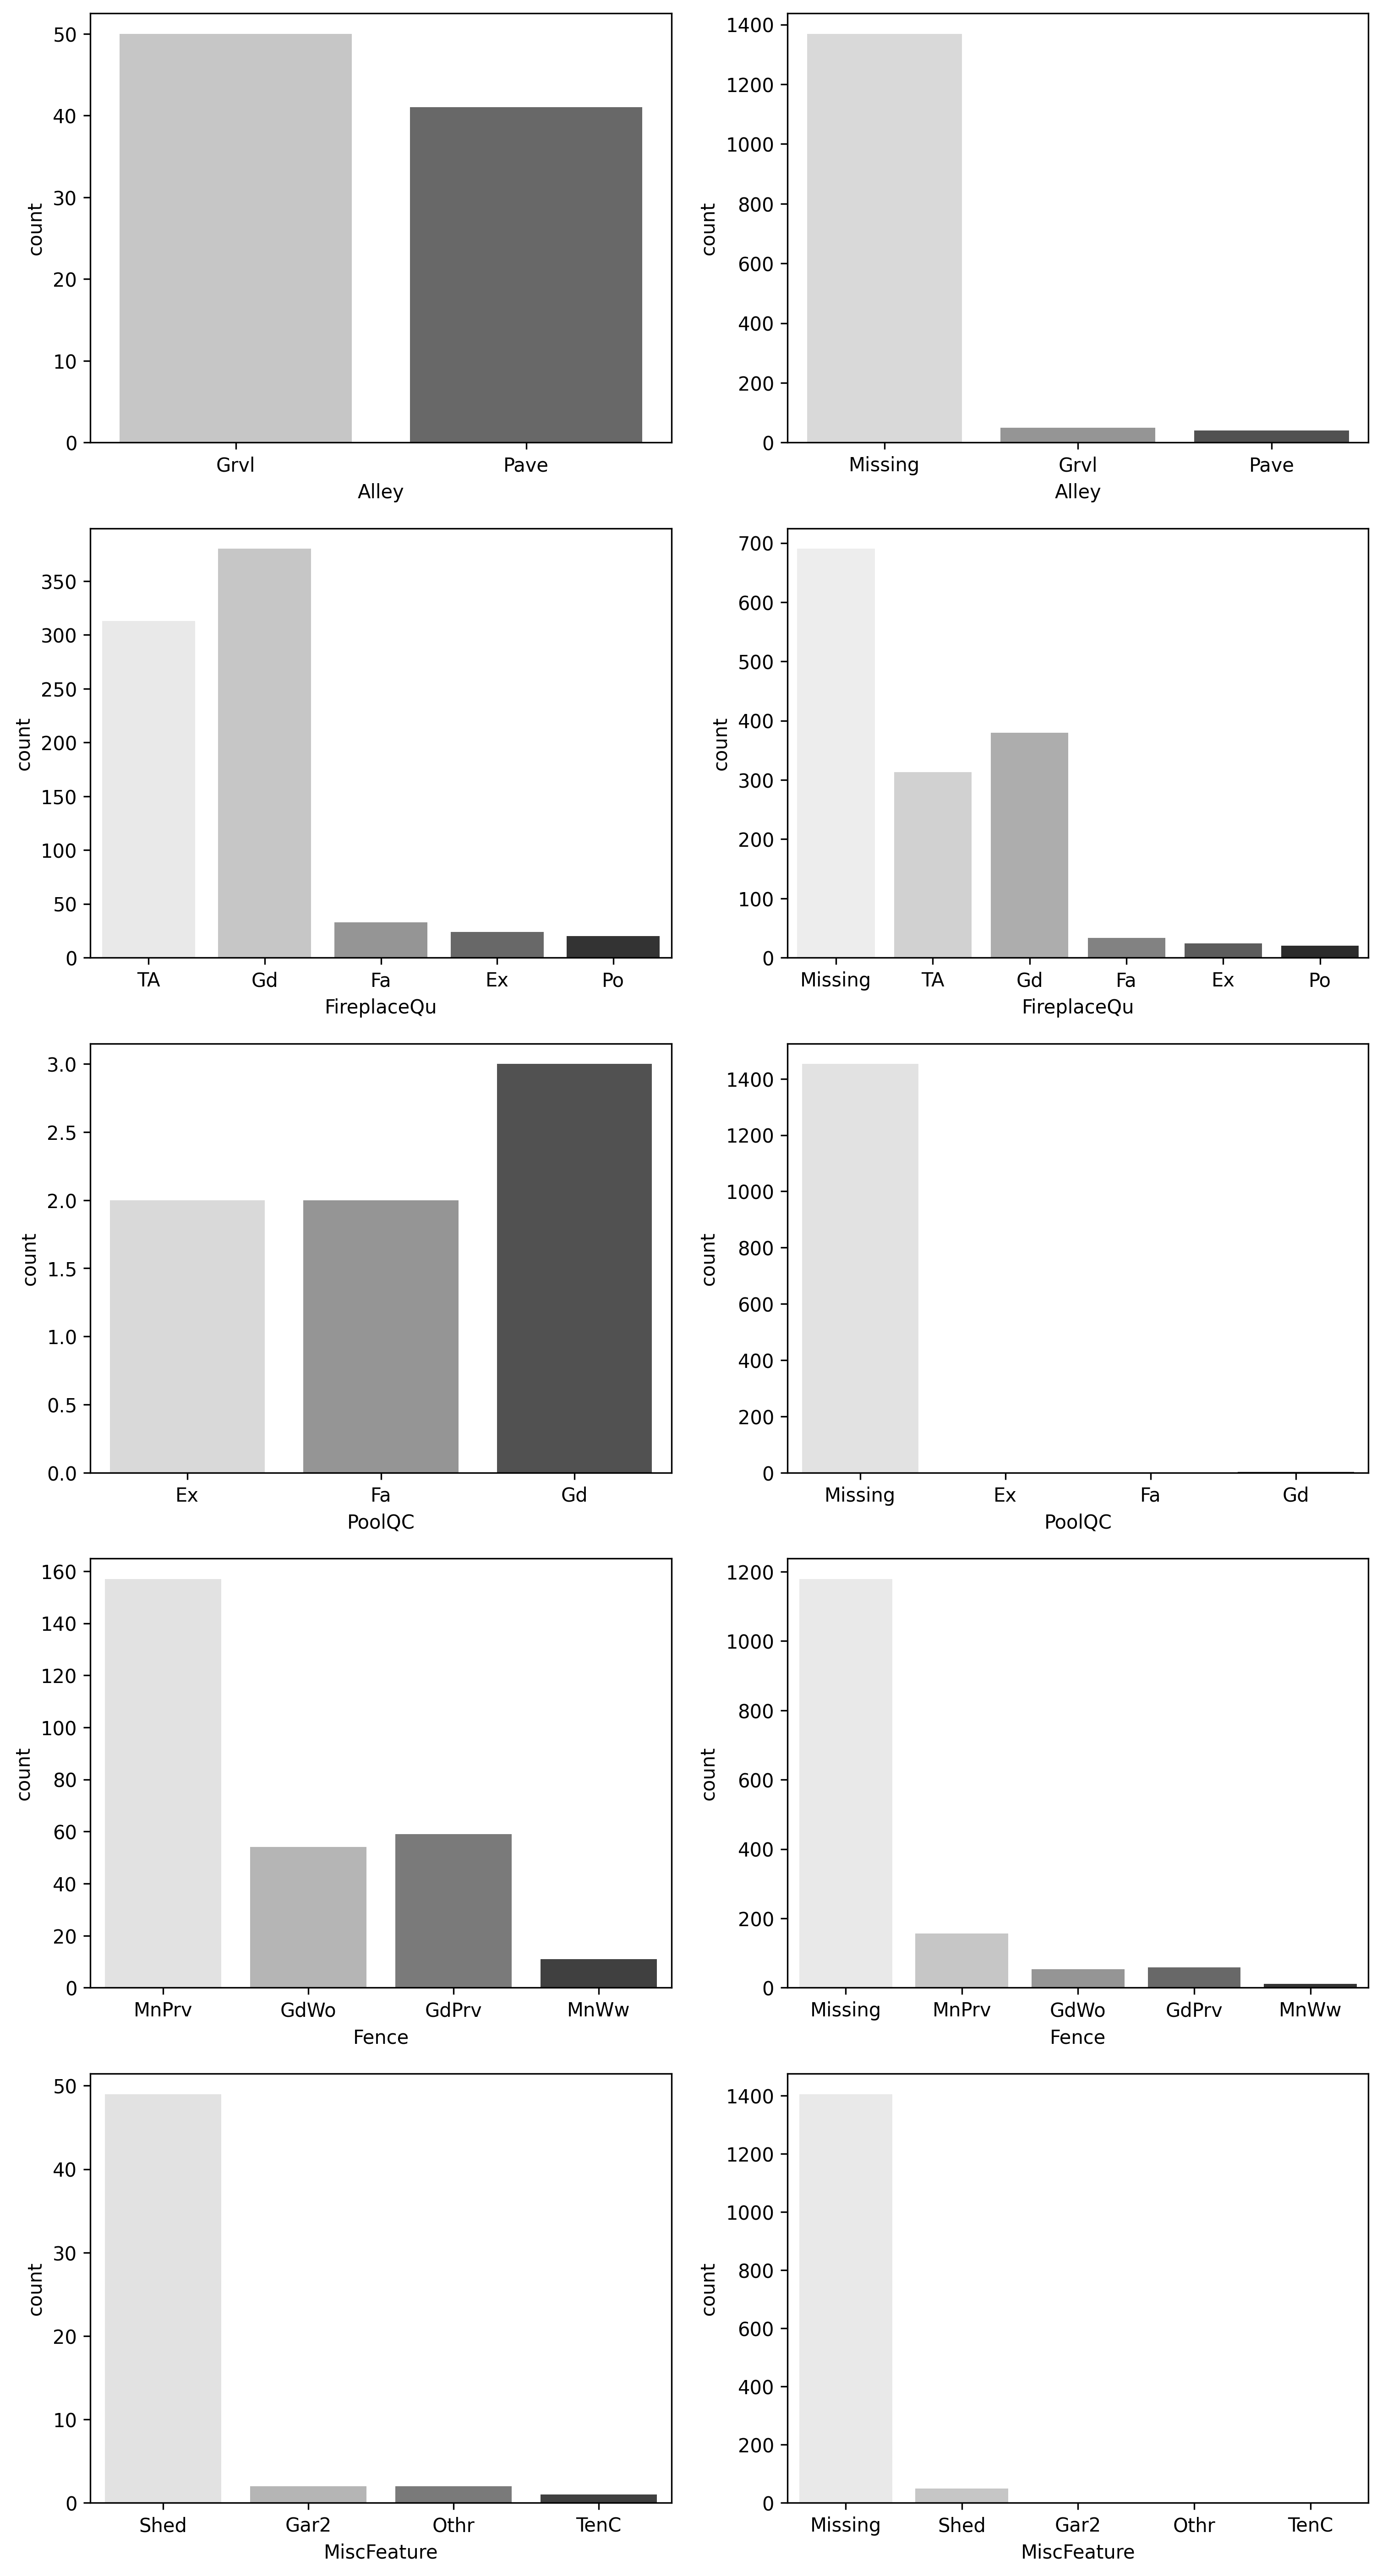

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=[12, 24], dpi=300)

for i in range(axes.shape[0]):
    sns.countplot(x=house_train_data[missing_most_cat_var.index.values[i]],
                  palette='Greys',
                  ax=axes[i,0])

for i in range(axes.shape[0]):
    sns.countplot(x=trans_cat[missing_most_cat_var.index.values[i]],
                  palette='Greys',
                  ax=axes[i,1])

plt.savefig('../graph/class_balance_after.png')
plt.show()